In [241]:
import pandas as pd
import numpy as np
%matplotlib inline
df_test = pd.read_csv('test.csv', na_values='NaN')
df_train = pd.read_csv('train.csv', na_values='NaN')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [191]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Описание признаков

## Survived

Главный признак, который нужно предсказать - выжил человек в катастрофе или нет.

## Pclass

Класс купленного билета. Вкдючает в себя 3 значения 1 (первый класс), 2 (второй), 3 (третий).
Эвакуация людей проходила с верхних палуб, потому что там находились шлюпки. Это значит, что пассажиры 1го класса быстрее могли добраться до шлюпок. 

Соответственно, можно предположить, что больше всего спаслось пассажиров 1го класса, чуть меньше 2го и еще меньше 3го.

1    62.962963
2    47.282609
3    24.236253
Name: Pclass, dtype: float64


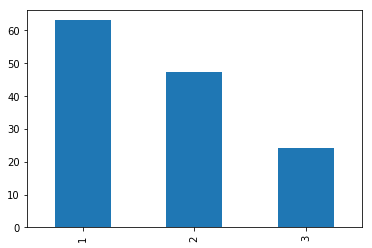

In [192]:
import matplotlib.pyplot as plt
allPassangers = df_train['Pclass'].value_counts()
survived = df_train['Pclass'][df_train['Survived'] == 1].value_counts()
pclass = (survived / allPassangers) * 100
pclass.plot.bar()
print(pclass)

Предположение подтвердилось. Всего 24% пассажиров 3го класса спаслось!

## Name

Имя пассажира. Так же это поле может включать имена родственников.

Не думаю, что это важно значение, стоит отказаться от этого признака.

## Sex

Пол пассажира.

Так как в первую очередь спасают женщин и детей, предполагаю, что женщин спаслось больше чем мужчин.

female    74.203822
male      18.890815
Name: Sex, dtype: float64


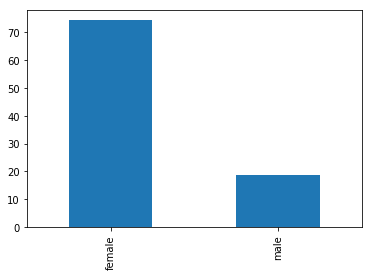

In [193]:
allPassangers = df_train['Sex'].value_counts()
survived = df_train['Sex'][df_train['Survived'] == 1].value_counts()
gender = (survived / allPassangers) * 100
gender.plot.bar()
print(gender)

Так и есть.

## Age

Возраст пассажира.

In [194]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [195]:
df_train['Age'].sort_values().head(10)

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
831    0.83
305    0.92
827    1.00
381    1.00
164    1.00
Name: Age, dtype: float64

In [196]:
df_train['Age'].dropna().sort_values().tail(10)

280    65.0
456    65.0
33     66.0
672    70.0
745    70.0
116    70.5
493    71.0
96     71.0
851    74.0
630    80.0
Name: Age, dtype: float64

Разделим все возраста на 3 категории. Взрослые, дети и пожилые люди. И посмотрим какое количество спаслось из каждой категории.

oldsters    26.923077
adults      38.608696
childs      53.982301
dtype: float64


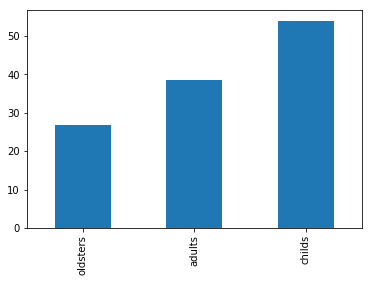

In [197]:
ages = df_train[['Age', 'Survived']].dropna()
childs = ages[ages['Age'] < 18]
adults = ages[(ages['Age'] >= 18) & (ages['Age'] < 60)]
oldsters = ages[ages['Age'] >= 60]
age_cat = pd.Series({
    'childs': float(len(childs[childs['Survived'] == 1])) / len(childs) * 100,
    'adults': float(len(adults[adults['Survived'] == 1])) / len(adults) * 100,
    'oldsters': float(len(oldsters[oldsters['Survived'] == 1])) / len(oldsters) * 100,
})
age_cat.sort_values(inplace=True)
age_cat.plot.bar()
print(age_cat)

Как и ожидалось, детей спаслось больше всего!

In [64]:
pd.Series({
    'childs': len(childs[childs['Survived'] == 1]),
    'adults':len(adults[adults['Survived'] == 1]),
    'oldsters': len(oldsters[oldsters['Survived'] == 1]),
})

adults      222
childs       61
oldsters      7
dtype: int64

## SibSp

Количество братьев и сестер на борту.

In [155]:
sibsp = pd.Series({
    'with sublings': len(df_train[(df_train['SibSp'] > 0) & (df_train['Survived']== 1)]) / float(len(df_train[df_train['SibSp'] > 0])),
    'without sublings': len(df_train[(df_train['SibSp'] == 0) & (df_train['Survived']== 1)]) / float(len(df_train[df_train['SibSp'] > 0]))
})
sibsp

with sublings       0.466431
without sublings    0.742049
dtype: float64

Видимо люди, которые ехали без братьев и сестер с большей вероятностью выживали.

## Parch

Количество родителей или детей на борту (для конкретного пассажира).

In [154]:
parch = pd.Series({
    'with Parch': len(df_train[(df_train['Parch'] > 0) & (df_train['Survived']== 1)]) / float(len(df_train[df_train['SibSp'] > 0])),
    'without Parch': len(df_train[(df_train['Parch'] == 0) & (df_train['Survived']== 1)]) / float(len(df_train[df_train['SibSp'] > 0]))
})
parch

with Parch       0.385159
without Parch    0.823322
dtype: float64

Видим, что людей без своих родителей и детей на борту спаслось больше.

## Ticket

Номер билета. Думаю он нам не пригодится.

## Fare

Стоимость билета. Предполагаю, чем выше цена, тем богаче каюта и важнее пассажир.

In [74]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [84]:
df_train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [85]:
df_train[df_train['Survived'] == 1].groupby('Pclass')['Fare'].mean()

Pclass
1    95.608029
2    22.055700
3    13.694887
Name: Fare, dtype: float64

В среднем билет выжевшего стоить чуть дороже.

## Сabin

Номер каюты.

In [86]:
df_train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

Каюты указаны всего у 204 человек. И уникальных из них 147, это значит, что 57 пассажиров жили в тех же кютах.
Можно предположить, что кол-во человек в каюте, как-то влияет на выживание.

Но здесь мало данных, и я думаю стоит игнорировать этот признак.

## Embarked

Порт посадки пассажира на корабль. Всего их три - C = Cherbourg, Q = Queenstown, S = Southampton.

In [87]:
df_train[df_train['Survived'] == 1]['Embarked'].value_counts() / df_train['Embarked'].value_counts()

S    0.336957
C    0.553571
Q    0.389610
Name: Embarked, dtype: float64

In [88]:
df_train[df_train['Survived'] == 1]['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [89]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Я думаю, место посадки ни как не влияет на выживание пассажира и нужно избавиться от этого признака.

# Итог по признакам

Есть ряд признаков, которые, на мой взгляд, не влияют на выживание пассажира это - Embarked, Сabin, Ticket, Name.
Так же из статистики можно выделить сильно коррелирующие признаки это - Pclass, Sex, SibSp, Parch, Age.

# The План

Для начала я избавлюсь от мусорных признаков. Далее проведу 3 эксперимента.

1. Построить модели без преобразования признаков.
2. Преобразовать признаки. И посторить модели.
3. Выбрать 2-3 сильно коррелирующих признака, преобразовать и посторить модели.

## Преобразование признаков

Из статистики я вижу, что вероятность выжить возрастает:
    - чем меньше возраст
    - чем меньше класс
    - если пассажир женщина
    - если пассажир не имеет родителей на борту
    - если пассажир не имеет братьев и сестер
Можно заменить все эти признаки вероятностями из статистики.
Можно сложить колво родителей и братьев и сестер и так же посчитать вероятность.
Тем самым, я приведу все эти признаки к единому масштабу.

## Набор моделей

1. knn, кло-во соседей
2. LogisticRegression, CV
3. RandomForest, кол-во деревьев


## Кросс-валидация

Процедура эмпирического оценивания обобщающей способности алгоритмов, обучаемых по прецедентам.

Фиксируется некоторое множество разбиений исходной выборки на две подвыборки: обучающую и контрольную. Для каждого разбиения выполняется настройка алгоритма по обучающей подвыборке, затем оценивается его средняя ошибка на объектах контрольной подвыборки. Оценкой скользящего контроля называется средняя по всем разбиениям величина ошибки на контрольных подвыборках.

Если выборка независима, то средняя ошибка скользящего контроля даёт несмещённую оценку вероятности ошибки. Это выгодно отличает её от средней ошибки на обучающей выборке, которая может оказаться смещённой (оптимистически заниженной) оценкой вероятности ошибки, что связано с явлением переобучения.

# Подготовка

In [129]:
def save_submission(file_name, y_test):
    df_predicted = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_test})
    df_predicted.to_csv(file_name, sep=',', index=False)

def get_usefull(df):
    return df[['Pclass', 'SibSp', 'Parch', 'Age', 'Fare']]

def get_sex_col(df):
    return df[['Sex']]

from sklearn.preprocessing import LabelEncoder
class LabelEncoderPipelineFriendly(LabelEncoder):
    
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelEncoderPipelineFriendly, self).fit(X)
        
    def transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).transform(X).reshape(-1, 1)

    def fit_transform(self, X, y=None):
        return super(LabelEncoderPipelineFriendly, self).fit(X).transform(X).reshape(-1, 1)
    
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler,  Imputer, LabelBinarizer, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

baseTransform = make_union(*[
    make_pipeline(FunctionTransformer(get_sex_col, validate=False), LabelEncoderPipelineFriendly()),
    make_pipeline(FunctionTransformer(get_usefull, validate=False), Imputer(strategy='mean')),
])

# Эксперимент №1

In [108]:
X = baseTransform.fit_transform(df_train)
y = df_train['Survived']


#--------------- Разбиваем выборку на тестовую и тренировочную
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [140]:
#--------------- !!!!! kNN – метод ближайших соседей !!!!!
from sklearn.neighbors import KNeighborsClassifier
#--------------- Поиск оптимальных значений параметров
from sklearn.grid_search import GridSearchCV

def knn_cls(X_train, X_test, y_train, y_test):
    n_neighbors_array = [1, 3, 5, 7, 10, 15]
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
    grid.fit(X_train, y_train)

    best_cv_err = 1 - grid.best_score_
    best_n_neighbors = grid.best_estimator_.n_neighbors
    
    knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
    knn.fit(X_train, y_train)

    err_train = np.mean(y_train != knn.predict(X_train))
    err_test  = np.mean(y_test  != knn.predict(X_test))
    print ('KNN - ', err_train, err_test)
    return knn


In [141]:
knn = knn_cls(X_train, X_test, y_train, y_test)

('KNN - ', 0.27447833065810595, 0.30597014925373134)


In [142]:
#--------------- !!!!! LogisticRegression – логистическая регрессия !!!!!
from sklearn.linear_model import LogisticRegressionCV
def log_reg(X_train, X_test, y_train, y_test):
    cv_array = [5, 7, 10, 13, 20]
    lr = LogisticRegressionCV()
    grid = GridSearchCV(lr, param_grid={'cv': cv_array})
    grid.fit(X_train, y_train)

    best_cv_err = 1 - grid.best_score_
    best_cv = grid.best_estimator_.cv
    lr = LogisticRegressionCV(cv=best_cv)
    lr.fit(X_train, y_train)
    err_train = np.mean(y_train != lr.predict(X_train))
    err_test  = np.mean(y_test  != lr.predict(X_test))
    print ('LogisticRegression - ', err_train, err_test)
    return lr

In [143]:
lr = log_reg(X_train, X_test, y_train, y_test)

('LogisticRegression - ', 0.2231139646869984, 0.17164179104477612)


In [145]:
#--------------- !!!!! Random Forest – случайный лес !!!!!
from sklearn import ensemble
def ran_for(X_train, X_test, y_train, y_test):
    n_est_array = [10, 50, 100, 150, 300];
    rf = ensemble.RandomForestClassifier()
    grid = GridSearchCV(rf, param_grid={'n_estimators': n_est_array})
    grid.fit(X_train, y_train)
    best_cv_err = 1 - grid.best_score_
    best_n_est = grid.best_estimator_.n_estimators
    rf = ensemble.RandomForestClassifier(n_estimators=best_n_est)
    rf.fit(X_train, y_train)

    err_train = np.mean(y_train != rf.predict(X_train))
    err_test  = np.mean(y_test  != rf.predict(X_test))
    print ('Random Forest - ',err_train, err_test)
    return rf

In [146]:
rf = ran_for(X_train, X_test, y_train, y_test)

('Random Forest - ', 0.012841091492776886, 0.17164179104477612)


## Результат

Я привел признак Sex к числовому, заменил не достающие значение средним по признаку. Более преобразований не делал.
Лучше всего себя показали Random Forest и LogisticRegression - их ошибка на тестовой выборке одинаковая и равна 0.17164179104477612

In [147]:
x_res = baseTransform.fit_transform(df_test)
y_res = rf.predict(x_res)
save_submission('first_exp.csv', y_res)

результат на кагле - 0.72727

In [148]:
y_res = lr.predict(x_res)
save_submission('first_exp_lr.csv', y_res)

результат на кагле - 0.75119

# Эксперимент 2

In [256]:
def modify_pclass(df):
    return df['Pclass'].map(pclass)

def modify_gender(df):
    return df['Sex'].map(gender)

def get_cat_value(age):
    if age < 18:
        return age_cat['childs']
    if age > 60:
        return age_cat['oldsters']
    return age_cat['adults']

def modify_age(df):
    return df['Age'].map(get_cat_value)

def get_sibsp_value(sibsp_value):
    if sibsp_value == 0:
        return sibsp['without sublings']
    return sibsp['with sublings']

def modify_sibsp(df):
    return df['SibSp'].map(get_sibsp_value)

def get_parch_value(parch_value):
    if parch_value == 0:
        return parch['without Parch']
    return parch['with Parch']

def modify_parch(df):
    return df['Parch'].map(get_parch_value)

def get_age(df):
    return df[['Age']]

def proba_transform(df):
    return pd.DataFrame({
        'p': modify_pclass(df),
        'g': modify_gender(df),
        'a': modify_age(df),
        's': modify_sibsp(df),
        'pa': modify_parch(df)
    })
probaTransform = make_union(*[
    make_pipeline(FunctionTransformer(proba_transform, validate=False), Imputer(strategy='mean')),
])

In [257]:
X = probaTransform.fit_transform(df_train)
y = df_train['Survived']

#--------------- Разбиваем выборку на тестовую и тренировочную
from sklearn.cross_validation import train_test_split
args = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [258]:
knn = knn_cls(*args)

('KNN - ', 0.2231139646869984, 0.18656716417910449)


In [259]:
lr = log_reg(*args)

('LogisticRegression - ', 0.20545746388443017, 0.17910447761194029)


In [249]:
rf = ran_for(*args)

('Random Forest - ', 0.18459069020866772, 0.16791044776119404)


## Результат

In [261]:
x_res = probaTransform.fit_transform(df_test)
y_res = rf.predict(x_res)
save_submission('second_exp_rf.csv', y_res)

результат на кагле 0.77033

In [262]:
y_res = lr.predict(x_res)
save_submission('second_exp_lr.csv', y_res)

результат на кагле 0.76555

In [263]:
y_res = knn.predict(x_res)
save_submission('second_exp_knn.csv', y_res)

результат на кагле 0.72248

# Эксперимент 3

In [266]:
def proba_transform(df):
    return pd.DataFrame({
        'p': modify_pclass(df),
        'g': modify_gender(df),
        'a': modify_age(df)
    })
probaTransform = make_union(*[
    make_pipeline(FunctionTransformer(proba_transform, validate=False), Imputer(strategy='mean')),
])
X = probaTransform.fit_transform(df_train)
y = df_train['Survived']

#--------------- Разбиваем выборку на тестовую и тренировочную
from sklearn.cross_validation import train_test_split
args = train_test_split(X, y, test_size = 0.3, random_state = 11)
knn = knn_cls(*args)
lr = log_reg(*args)
rf = ran_for(*args)
x_res = probaTransform.fit_transform(df_test)
y_res = rf.predict(x_res)
save_submission('third_exp_rf.csv', y_res)
y_res = lr.predict(x_res)
save_submission('third_exp_lr.csv', y_res)
y_res = knn.predict(x_res)
save_submission('third_exp_knn.csv', y_res)

('KNN - ', 0.2086677367576244, 0.18283582089552239)
('LogisticRegression - ', 0.2247191011235955, 0.17537313432835822)
('Random Forest - ', 0.20545746388443017, 0.17537313432835822)


## Результаты

На кагле модели показали следующие результаты:
    - knn - 0.76076
    - LogisticRegression - 0.77033
    - Random Forest - 0.77033

# Итого

Модели с преобразованием признаков в вероятности показали себя лучше (чем без преобразования и чуть лучше чем сабмит с занятия), примерно на 0.02.
Уменьшение количества признаков в 3м эксперименте не привело к улучшению общего результата, но у LogisticRegression и Knn результат подскочил (особенно у knn), что интересно.

Я подумал, что преобразование признаков в вероятности в общем-то не плохая идея, но, я думаю это подходит для ограниченного набора элементов, например, для пола(Sex) или класса (Pclass). А еще в полном наборе данных эта вероятность может быть совершенно другой.

Такие поля как SibSp, Parch, Fare стоит масштабировать другим способом.

Поэтому попробую еще разок :)

# Эксперимент 4. Последняя надежда.

In [278]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, Imputer
def proba_transform(df):
    return pd.DataFrame({
        'p': modify_pclass(df),
        'g': modify_gender(df),
    })

def get_scalable_cols(df):
    return df[['SibSp', 'Parch', 'Fare']]

last_hope = make_union(*[
    make_pipeline(FunctionTransformer(proba_transform, validate=False)),
    make_pipeline(FunctionTransformer(get_scalable_cols, validate=False), Imputer(strategy='mean'), StandardScaler()),
])

In [279]:
X = last_hope.fit_transform(df_train)
y = df_train['Survived']

def predict_all(X, y, filename):
    args = train_test_split(X, y, test_size = 0.3, random_state = 11)
    knn = knn_cls(*args)
    lr = log_reg(*args)
    rf = ran_for(*args)
    x_res = last_hope.fit_transform(df_test)
    
    y_res = rf.predict(x_res)
    save_submission(filename + '_rf.csv', y_res)
    y_res = lr.predict(x_res)
    save_submission(filename + '_lr.csv', y_res)
    y_res = knn.predict(x_res)
    save_submission(filename + '_knn.csv', y_res)
    print('Done')

In [280]:
predict_all(X, y, 'fourth_exp')

('KNN - ', 0.15569823434991975, 0.21268656716417911)
('LogisticRegression - ', 0.21508828250401285, 0.16417910447761194)
('Random Forest - ', 0.078651685393258425, 0.18283582089552239)
Done


knn - 0.73684
LogisticRegression - 0.77033
Random Forest - 0.75119